<a href="https://www.meetup.com/Amazon-Web-Services-Mexico/"><img src="images/AWSCDMX.png"></a>
# MeetUp Grupo de Usuarios AWS CDMX 20190424

# Uso de AWS con Python

## David Jonathan Sol Llaven
T-Systems México

Contacto:
- https://medium.com/@soldavid
- Grupo de Usuarios AWS Ciudad de México: https://www.meetup.com/Amazon-Web-Services-Mexico/
- Canal de Slack: https://launchpass.com/awscdmx

## ¿Cómo manejamos AWS?

### A través de la [Consola AWS](https://aws.amazon.com/console/)

<img src="images/consola.png">

### A través de llamadas API directas

    https://ec2.amazonaws.com/?Action=RunInstances
    &ImageId=ami-2bb65342
    &MaxCount=3
    &MinCount=1
    &Placement.AvailabilityZone=us-east-1a
    &Monitoring.Enabled=true
    &Version=2016-11-15
    &X-Amz-Algorithm=AWS4-HMAC-SHA256
    &X-Amz-Credential=AKIAIOSFODNN7EXAMPLEus-east-1%2Fec2%2Faws4_request
    &X-Amz-Date=20130813T150206Z
    &X-Amz-SignedHeaders=content-type%3Bhost%3Bx-amz-date
    &X-Amz-Signature=ced6826de92d2bdeed8f846f0bf508e8559e98e4b0194b84example54174deb456c
    Content-type: application/json
    host:ec2.amazonaws.com

### A través de [AWS CLI](https://aws.amazon.com/cli/)

    >aws s3 ls  --profile SNDBX
    2018-07-17 15:39:39 amqlkinnsgtw01a-fileshare-smb
    2018-09-20 21:03:54 amsbtinnsgtw01g
    2018-09-06 11:10:39 amseninnaim01g
    2018-11-22 17:58:51 amseninnseg01g
    2018-05-21 15:13:49 cf-templates-fmsc56vfvtdz-us-east-1
    2019-03-26 11:45:38 orquestacion
    2019-02-26 16:04:42 red-hat-openshift-openshiftstack-1-registrybucket-1a1uc2vy8hvhp
    2019-02-26 16:04:43 red-hat-openshift-openshiftstack-1e0-outputbucket-x2ogc6th606q
    2019-02-26 16:04:50 red-hat-openshift-openshiftstack-lambdazipsbucket-s82l02hs48gx

### A través de los [SDKs](https://aws.amazon.com/tools/)

- Javascript
- PHP
- Go
- Ruby
- Java
- Muchos más...

### El SDK de Python se llama [Boto3](https://aws.amazon.com/sdk-for-python/)

Nos permite el acceso a los recursos de AWS de forma simple, a traves de:

- Clientes: Acceso de Bajo Nivel

      sqs = boto3.client('sqs')

- Recursos: Acceso de Alto Nivel

      s3 = boto3.resource('s3')

Y nos proporciona mecanismos para ejecutar comandos como son:

- Sesiones

      session = boto3.session.Session()
    
- Colecciones

      for bucket in s3.buckets.all():
          print(bucket.name)
    
- Paginadores

      paginator = client.get_paginator('list_objects')
      page_iterator = paginator.paginate(Bucket='my-bucket')
      for page in page_iterator:
          print(page['Contents'])
        
- Waiters

      waiter = client.get_waiter('alarm_exists')

## Ejemplos en la vida real

No van a funcionar para otras personas, ya que utilizan mi configuración local.

Lo cual es excelente, por que se puede compatir código y documentación sin arriesgar nuestras credenciales.

In [1]:
# Importa el SDK para AWS
import boto3
# Abre una sesion con un nombre de perfil definido en el archivo ~/.aws/credentials
session = boto3.session.Session(profile_name='DEV')
# También se puede hacer tuilizando variables de ambiente del sistema operativo:
# AWS_PROFILE
# AWS_ACCESS_KEY_ID
# AWS_SECRET_ACCESS_KEY
# Para mas información ver https://boto3.amazonaws.com/v1/documentation/api/latest/guide/configuration.html
# Usando esa sesión se abre una conexión tipo recurso a S3
s3 = session.resource('s3')
# Se obtienen todos los buckets en esa cuenta, y se imprime el nombre de cada una de ellas
for bucket in s3.buckets.all():
    print(bucket.name)

amcfmdevavpc01g
amcfmdevfasm01-s3bucket-3sea8j8px95q
amcpydevstgw01a
amcpydevstgw02a
amcpydevstgw03a
amevedevas3b01a
amevedevas3b02a
amevedevas3b03a
amgscdevstgw01a
amneedevstgw01a
amneedevstgw02a
amneedevstgw03a
amocpdevobuk01a
ampdcdevstgw01a
ampdcdevstgw02a
ampdcdevstgw03a
amsbtdevstgw01
amsendevftp201g
amsmvdevstgw01a
amvqrdevstgw01a
amvqrdevstgw02a
cf-templates-1ddbq225pgox5-us-east-1
elblogs3011
rh-sena-bucket-843
senha-bucket-061829
senha-bucket-rh-1355
senha-bucket-rh-1406
senha-bucket-rh-1550
senha-bucket-rh-1558
senha-bucket-rh-1736
senha-inami-dev-01
senha-logs
senha-logs-alb-waf-f5
senha-pit-storagegateway
senhatemplates
tmple


In [3]:
bucket = s3.Bucket('amcfmdevavpc01g')
fecha = bucket.creation_date.strftime('%Y-%m-%d a las %H:%M')
print(f'Bucket {bucket.name} creada el {fecha}')

Bucket amcfmdevavpc01g creada el 2018-09-17 a las 22:27


In [6]:
import pprint
s3_client = session.client('s3')
paginator = s3_client.get_paginator('list_objects')
page_iterator = paginator.paginate(Bucket='amneedevstgw01a')
for page in page_iterator:
          pprint.pprint(page['Contents'])

[{'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
  'Key': 'siat/',
  'LastModified': datetime.datetime(2018, 12, 5, 18, 10, 35, tzinfo=tzutc()),
  'Owner': {'DisplayName': 'dev.senha',
            'ID': '78fc1469a9135f6f964d6425409d53959bb4db9acae5443386dd1f4825b81be6'},
  'Size': 0,
  'StorageClass': 'STANDARD'},
 {'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
  'Key': 'siat/configuracion/',
  'LastModified': datetime.datetime(2019, 5, 29, 19, 0, 7, tzinfo=tzutc()),
  'Owner': {'DisplayName': 'dev.senha',
            'ID': '78fc1469a9135f6f964d6425409d53959bb4db9acae5443386dd1f4825b81be6'},
  'Size': 0,
  'StorageClass': 'STANDARD'},
 {'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
  'Key': 'siat/configuracion/comun/',
  'LastModified': datetime.datetime(2019, 5, 29, 23, 46, 46, tzinfo=tzutc()),
  'Owner': {'DisplayName': 'dev.senha',
            'ID': '78fc1469a9135f6f964d6425409d53959bb4db9acae5443386dd1f4825b81be6'},
  'Size': 0,
  'StorageClass': 'STANDARD'},
 {'ETag': '"a3cdd5f590e

In [7]:
session = boto3.session.Session(profile_name='PRD')
cloudwatch_client = session.client('cloudwatch')
cadena_widget = '{ "metrics": [ [ "AWS/CloudFront", "Requests", "Region", "Global", "DistributionId", "E4MSYTJKDY01N", { "period": 3600, "stat": "Sum" } ] ], "view": "timeSeries", "stacked": false, "width": 800, "height": 300, "start": "-P28D", "end": "P0D", "timezone": "-0500" }'
respuesta = cloudwatch_client.get_metric_widget_image(MetricWidget=cadena_widget)

In [8]:
respuesta["MetricWidgetImage"]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01,\x10\x06\x00\x00\x00k\xbd\x0by\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\xff\xff\xff\xff\xff\xff\tX\xf7\xdc\x00\x00\x00\tpHYs\x00\x00\x00`\x00\x00\x00`\x00\xf0kB\xcf\x00\x00\x00\x07tIME\x07\xe3\x05\x1e\x05+9\x0b\x9c\xdb\xda\x00\x00\x80\x00IDATx\xda\xed\xfdi\xb8U\xd5\xdd\xe6\x8d\xa6\xaa>T\xd5S\xe7\xd4[u\xd5{\xd5\x87s\xdes=IL\x1e\x9b$\xb6\x89Mb\x13c\x83Q\xd4\xa8\xb17\xc6\x18c\x1f{\xa3 \x08H+}#}\x8f4\xa2\x88\x02\xc2\x06\xe9\xfb\xbeo\x05\x11\x10\x11\x05\x04\x11\x91$\xfa\xd4<\x8c1\xb9Yk\xff\xf7\x9e{\xcd5\xe7\x18c\x8e\xb9\xd6\xfd\xe3\xc3\xba6{\xed\xb5\xd6\\c\xce1\xc7\xf87\xf7\xfd\xbd\x80\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\xa4\xc2\xf8\x1e\xbf\x02B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84T\x1aL\x80\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\xa4\xe2`\x02\x84\x10B\x08!\x84\x10B\x08

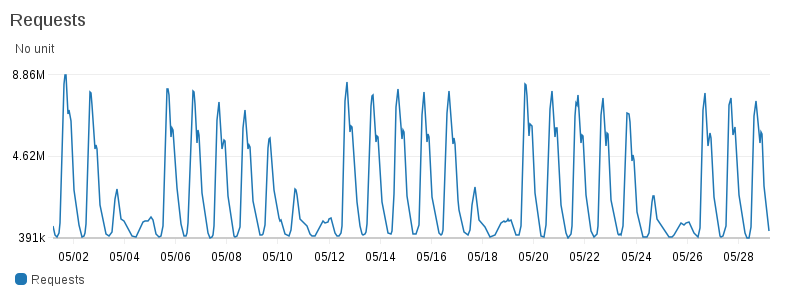

In [9]:
from IPython.display import Image
Image(respuesta["MetricWidgetImage"]) 

![Python](images/Python.jpg)
## ¿Qué es [Python](https://www.python.org/)?
Python es un lenguaje interpretado de tipos de variables dinámico, que ha ganado mucha popularidad dada su facilidad de aprendizaje, claridad en el código y amplio número de librerias para muchos casos de uso.
* Creado en 1991 por Guido van Rossum
https://www.python.org/

![Anaconda](images/Anaconda.png)
## ¿Qué es [Anaconda](https://www.anaconda.com/)?
Es un plataforma para realizar Ciencia de Datos con Python/R (y mas).
![Anaconda distribution](images/Anaconda_Distribution.png)

![Conda](images/Conda.svg)
## ¿Qué es [Conda](https://conda.io/en/latest/)?
Es un administrador de paquetes (librerias), dependencias y ambientes para Python, pero además soporta *cualquier* lenguaje.

Funciona en Linux, MacOs y Windows.

Nos permite definir *Ambientes Virtuales*.

Hay dos _versiones_:

- Anaconda: Incluye todos los paquetes de Anaconda, y ocupa alrededor de 3 GB.
- Miniconda: Solo lo minimo requerido, ocupa 400 MB. *Permite instalar paquetes posteriormente*

Mi recomendación es instalar Miniconda, y agregar los paquetes deseados en Ambientes Virtuales. Excepto que sepan y utilicen todo lo que Anaconda incluye.

[Instrucciones de Instalación](https://conda.io/projects/conda/en/latest/user-guide/install/index.html)

## Agregar el canal [conda-forge](https://conda-forge.org/)

Es una colección de paquetes generada por al acomunidad para Conda.

nos da acceso a mas paquetes (incluyendo muchos de AWS) y versiones mas actualziadas de los mismos.

In [ ]:
conda config --add channels conda-forge

## Actualización de Conda

In [ ]:
D:\conda update conda
Collecting package metadata: done
Solving environment: done

## Package Plan ##

  environment location: d:\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    libblas-3.8.0              |            6_mkl         3.5 MB  conda-forge
    libcblas-3.8.0             |            6_mkl         3.5 MB  conda-forge
    liblapack-3.8.0            |            6_mkl         3.5 MB  conda-forge
    mkl-service-2.0.1          |   py37hfa6e2cd_0          58 KB  conda-forge
    spyder-3.3.4               |           py37_0         2.7 MB
    ------------------------------------------------------------
                                           Total:        13.3 MB

The following packages will be UPDATED:

  blas                                          conda-forge --> pkgs/main
  cryptography                           2.5-py37h74b6da3_1 --> 2.6.1-py37hb32ad35_0
  icu                          conda-forge::icu-58.2-vc14_0 --> pkgs/main::icu-58.2-ha66f8fd_1
  krb5                                 1.16.3-h038dc86_1000 --> 1.16.3-hdd46e55_1001
  libarchive                            3.3.3-hd1ea8e3_1002 --> 3.3.3-h0005e80_1004
  libblas                           3.8.0-5_h8933c1f_netlib --> 3.8.0-6_mkl
  libcblas                          3.8.0-5_h8933c1f_netlib --> 3.8.0-6_mkl
  liblapack                         3.8.0-5_h8933c1f_netlib --> 3.8.0-6_mkl
  libssh2                               1.8.0-hc4dcbb0_1003 --> 1.8.2-h642c060_2
  lz4-c                                      1.8.1.2-vc14_0 --> 1.8.3-he025d50_1001
  mkl                                            2018.0.3-1 --> 2019.3-203
  mkl-service        pkgs/main::mkl-service-1.1.2-py37hb21~ --> conda-forge::mkl-service-2.0.1-py37hfa6e2cd_0
  mkl_fft            pkgs/main::mkl_fft-1.0.6-py37hdbbee80~ --> conda-forge::mkl_fft-1.0.12-py37hfa6e2cd_0
  mkl_random         pkgs/main::mkl_random-1.0.1-py37h77b8~ --> conda-forge::mkl_random-1.0.2-py37h830ac7b_2
  numpy-base                          1.14.5-py37h4a99626_4 --> 1.16.3-py37hc3f5095_0
  openssl                                 1.0.2r-hfa6e2cd_0 --> 1.1.1b-hfa6e2cd_2
  pyqt               conda-forge::pyqt-5.6.0-py37h764d66f_~ --> pkgs/main::pyqt-5.9.2-py37h6538335_2
  qt                       conda-forge::qt-5.6.2-h2639256_8 --> pkgs/main::qt-5.9.7-vc14h73c81de_0
  scipy                                1.1.0-py37h4f6bf74_1 --> 1.2.1-py37h29ff71c_0
  sip                              4.18.1-py37h6538335_1000 --> 4.19.8-py37h6538335_1000
  vc                                   conda-forge::vc-14-0 --> pkgs/main::vc-14.1-h0510ff6_4
  vs2015_runtime     conda-forge::vs2015_runtime-14.0.2542~ --> pkgs/main::vs2015_runtime-14.15.26706-h3a45250_0

The following packages will be SUPERSEDED by a higher-priority channel:

  numpy              conda-forge::numpy-1.16.3-py37h873a0b~ --> pkgs/main::numpy-1.16.3-py37h19fb1c0_0
  spyder                                        conda-forge --> pkgs/main

The following packages will be DOWNGRADED:

  pycurl                            7.43.0.2-py37h74b6da3_0 --> 7.43.0.2-py37h7a1dbc1_0


Proceed ([y]/n)? y


Downloading and Extracting Packages
libcblas-3.8.0       | 3.5 MB    | ################################################################################# | 100%
mkl-service-2.0.1    | 58 KB     | ################################################################################# | 100%
liblapack-3.8.0      | 3.5 MB    | ################################################################################# | 100%
libblas-3.8.0        | 3.5 MB    | ################################################################################# | 100%
blas-1.0             | 6 KB      | ################################################################################# | 100%
spyder-3.3.4         | 2.7 MB    | ################################################################################# | 100%
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

D:\>conda update conda
Collecting package metadata: done
Solving environment: done

# All requested packages already installed.

## Crear ambientes virtuales

Nos permiten desarrollar y/o operr con la tranquilidad de no tener conflictos entre diferentes versiones requeridas de paquetes.

Podemos elegir la versión de Python y los paquetes a utilizar de forma independiente.

In [ ]:
D:\>conda create --name aws python=3.7
Collecting package metadata: done
Solving environment: done

## Package Plan ##

  environment location: d:\anaconda3\envs\aws

  added / updated specs:
    - python=3.7


The following NEW packages will be INSTALLED:

  ca-certificates    conda-forge/win-64::ca-certificates-2019.3.9-hecc5488_0
  certifi            conda-forge/win-64::certifi-2019.3.9-py37_0
  openssl            conda-forge/win-64::openssl-1.1.1b-hfa6e2cd_2
  pip                conda-forge/win-64::pip-19.0.3-py37_0
  python             conda-forge/win-64::python-3.7.3-hb12ca83_0
  setuptools         conda-forge/win-64::setuptools-41.0.1-py37_0
  sqlite             conda-forge/win-64::sqlite-3.26.0-hfa6e2cd_1001
  vc                 conda-forge/win-64::vc-14-0
  vs2015_runtime     conda-forge/win-64::vs2015_runtime-14.0.25420-0
  wheel              conda-forge/win-64::wheel-0.33.1-py37_0
  wincertstore       conda-forge/win-64::wincertstore-0.2-py37_1002


Proceed ([y]/n)? y

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
#
# To activate this environment, use
#
#     $ conda activate aws
#
# To deactivate an active environment, use
#
#     $ conda deactivate

## Utilizar el ambiente virtual

In [ ]:
D:\>conda activate aws

(aws) D:\>conda list
# packages in environment at d:\anaconda3\envs\aws:
#
# Name                    Version                   Build  Channel
ca-certificates           2019.3.9             hecc5488_0    conda-forge
certifi                   2019.3.9                 py37_0    conda-forge
openssl                   1.1.1b               hfa6e2cd_2    conda-forge
pip                       19.0.3                   py37_0    conda-forge
python                    3.7.3                hb12ca83_0    conda-forge
setuptools                41.0.1                   py37_0    conda-forge
sqlite                    3.26.0            hfa6e2cd_1001    conda-forge
vc                        14                            0    conda-forge
vs2015_runtime            14.0.25420                    0    conda-forge
wheel                     0.33.1                   py37_0    conda-forge
wincertstore              0.2                   py37_1002    conda-forge

## Instalar los paquetes de AWS

In [ ]:
(aws) D:\>conda install awscli boto3 -y
Collecting package metadata: done
Solving environment: done

## Package Plan ##

  environment location: d:\anaconda3\envs\aws

  added / updated specs:
    - awscli
    - boto3


The following NEW packages will be INSTALLED:

  asn1crypto         conda-forge/win-64::asn1crypto-0.24.0-py37_1003
  awscli             conda-forge/win-64::awscli-1.16.144-py37_0
  boto3              conda-forge/noarch::boto3-1.9.134-py_0
  botocore           conda-forge/noarch::botocore-1.12.134-py_0
  cffi               conda-forge/win-64::cffi-1.12.3-py37hb32ad35_0
  colorama           conda-forge/noarch::colorama-0.3.9-py_1
  cryptography       conda-forge/win-64::cryptography-2.6.1-py37hb32ad35_0
  docutils           conda-forge/win-64::docutils-0.14-py37_1001
  idna               conda-forge/win-64::idna-2.8-py37_1000
  jmespath           conda-forge/noarch::jmespath-0.9.4-py_0
  pyasn1             conda-forge/noarch::pyasn1-0.4.4-py_1
  pycparser          conda-forge/win-64::pycparser-2.19-py37_1
  pyopenssl          conda-forge/win-64::pyopenssl-19.0.0-py37_0
  pysocks            conda-forge/win-64::pysocks-1.6.8-py37_1002
  python-dateutil    conda-forge/noarch::python-dateutil-2.8.0-py_0
  pyyaml             conda-forge/win-64::pyyaml-3.13-py37hfa6e2cd_1001
  rsa                conda-forge/noarch::rsa-3.4.2-py_1
  s3transfer         conda-forge/win-64::s3transfer-0.2.0-py37_0
  six                conda-forge/win-64::six-1.12.0-py37_1000
  urllib3            conda-forge/win-64::urllib3-1.24.2-py37_0
  win_inet_pton      conda-forge/win-64::win_inet_pton-1.1.0-py37_0
  yaml               conda-forge/win-64::yaml-0.1.7-hfa6e2cd_1001

Preparing transaction: done
Verifying transaction: done
Executing transaction: done

![AWS CLI](images/AWSCLI.png)
## Configurar AWS CLI

In [ ]:
(aws) D:\>aws configure --profile DEV
AWS Access Key ID [****************XXXX]: ****************XXXX
AWS Secret Access Key [****************XXXX]: ****************XXXX
Default region name [us-east-1]: us-east-1
Default output format [json]: json
    
(aws) D:\>aws s3 ls --profile DEV

![Boto3](images/AWSSDK.png)
## Validar Boto3

In [ ]:
import boto3
session = boto3.session.Session(profile_name='DEV')
s3 = session.resource('s3')
for bucket in s3.buckets.all():
    print(bucket.name)

![Jupyter](images/Jupyter.png)
## ¿Qué es [Jupyter Notebook](https://jupyter.org/)?
Es una aplicación web que permite crear y compartir documentos que contienen código real, visualizaciones y texto.

Se puede utilizar para documentar procesos, desarrollar programas interactivamente e incluso dar presentaciones.

## Instalar Jupyter Notebook

In [ ]:
(aws) D:\>conda install jupyter -y
Collecting package metadata: done
Solving environment: done

## Package Plan ##

  environment location: d:\anaconda3\envs\aws

  added / updated specs:
    - jupyter


The following NEW packages will be INSTALLED:

  attrs              conda-forge/noarch::attrs-19.1.0-py_0
  backcall           conda-forge/noarch::backcall-0.1.0-py_0
  bleach             conda-forge/noarch::bleach-3.1.0-py_0
  decorator          conda-forge/noarch::decorator-4.4.0-py_0
  defusedxml         conda-forge/noarch::defusedxml-0.5.0-py_1
  entrypoints        conda-forge/win-64::entrypoints-0.3-py37_1000
  icu                pkgs/main/win-64::icu-58.2-ha66f8fd_1
  ipykernel          conda-forge/win-64::ipykernel-5.1.0-py37h39e3cac_1002
  ipython            conda-forge/win-64::ipython-7.4.0-py37h39e3cac_0
  ipython_genutils   conda-forge/noarch::ipython_genutils-0.2.0-py_1
  ipywidgets         conda-forge/noarch::ipywidgets-7.4.2-py_0
  jedi               conda-forge/win-64::jedi-0.13.3-py37_0
  jinja2             conda-forge/noarch::jinja2-2.10.1-py_0
  jpeg               conda-forge/win-64::jpeg-9c-hfa6e2cd_1001
  jsonschema         conda-forge/win-64::jsonschema-3.0.1-py37_0
  jupyter            conda-forge/noarch::jupyter-1.0.0-py_2
  jupyter_client     conda-forge/noarch::jupyter_client-5.2.4-py_3
  jupyter_console    conda-forge/noarch::jupyter_console-6.0.0-py_0
  jupyter_core       conda-forge/noarch::jupyter_core-4.4.0-py_0
  libpng             conda-forge/win-64::libpng-1.6.37-h7602738_0
  libsodium          conda-forge/win-64::libsodium-1.0.16-h2fa13f4_1001
  m2w64-gcc-libgfor~ pkgs/msys2/win-64::m2w64-gcc-libgfortran-5.3.0-6
  m2w64-gcc-libs     pkgs/msys2/win-64::m2w64-gcc-libs-5.3.0-7
  m2w64-gcc-libs-co~ pkgs/msys2/win-64::m2w64-gcc-libs-core-5.3.0-7
  m2w64-gmp          pkgs/msys2/win-64::m2w64-gmp-6.1.0-2
  m2w64-libwinpthre~ pkgs/msys2/win-64::m2w64-libwinpthread-git-5.0.0.4634.697f757-2
  markupsafe         conda-forge/win-64::markupsafe-1.1.1-py37hfa6e2cd_0
  mistune            conda-forge/win-64::mistune-0.8.4-py37hfa6e2cd_1000
  msys2-conda-epoch  pkgs/msys2/win-64::msys2-conda-epoch-20160418-1
  nbconvert          conda-forge/noarch::nbconvert-5.4.1-py_2
  nbformat           conda-forge/noarch::nbformat-4.4.0-py_1
  notebook           conda-forge/win-64::notebook-5.7.8-py37_0
  pandoc             conda-forge/win-64::pandoc-2.7.2-0
  pandocfilters      conda-forge/noarch::pandocfilters-1.4.2-py_1
  parso              conda-forge/noarch::parso-0.4.0-py_0
  pickleshare        conda-forge/win-64::pickleshare-0.7.5-py37_1000
  prometheus_client  conda-forge/noarch::prometheus_client-0.6.0-py_0
  prompt_toolkit     conda-forge/noarch::prompt_toolkit-2.0.9-py_0
  pygments           conda-forge/noarch::pygments-2.3.1-py_0
  pyqt               pkgs/main/win-64::pyqt-5.9.2-py37h6538335_2
  pyrsistent         conda-forge/win-64::pyrsistent-0.14.11-py37hfa6e2cd_0
  pywinpty           conda-forge/win-64::pywinpty-0.5.5-py37_1000
  pyzmq              conda-forge/win-64::pyzmq-18.0.1-py37he7828b0_1
  qt                 pkgs/main/win-64::qt-5.9.7-vc14h73c81de_0
  qtconsole          conda-forge/noarch::qtconsole-4.4.3-py_0
  send2trash         conda-forge/noarch::send2trash-1.5.0-py_0
  sip                conda-forge/win-64::sip-4.19.8-py37h6538335_1000
  terminado          conda-forge/win-64::terminado-0.8.2-py37_0
  testpath           conda-forge/noarch::testpath-0.4.2-py_1001
  tornado            conda-forge/win-64::tornado-6.0.2-py37hfa6e2cd_0
  traitlets          conda-forge/win-64::traitlets-4.3.2-py37_1000
  wcwidth            conda-forge/noarch::wcwidth-0.1.7-py_1
  webencodings       conda-forge/noarch::webencodings-0.5.1-py_1
  widgetsnbextension conda-forge/win-64::widgetsnbextension-3.4.2-py37_1000
  winpty             conda-forge/win-64::winpty-0.4.3-4
  zeromq             conda-forge/win-64::zeromq-4.3.1-he025d50_1000
  zlib               conda-forge/win-64::zlib-1.2.11-h2fa13f4_1004

The following packages will be UPDATED:

  vc                                   conda-forge::vc-14-0 --> pkgs/main::vc-14.1-h0510ff6_4
  vs2015_runtime     conda-forge::vs2015_runtime-14.0.2542~ --> pkgs/main::vs2015_runtime-14.15.26706-h3a45250_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: - b'Enabling notebook extension jupyter-js-widgets/extension...\n      - Validating: ok\n'
done

## Ejecutar Jupyter Notebook

In [ ]:
(aws) D:\>jupyter notebook

![Jupyter home](images/JupyterHome.png)

## Desactivar Ambiente Virtual

In [ ]:
(aws) D:\>conda deactivate

D:\>

## Gracias
![Ciencia](images/Science.jpg)

<a style="background-color:black;color:white;text-decoration:none;padding:4px 6px;font-family:-apple-system, BlinkMacSystemFont, &quot;San Francisco&quot;, &quot;Helvetica Neue&quot;, Helvetica, Ubuntu, Roboto, Noto, &quot;Segoe UI&quot;, Arial, sans-serif;font-size:12px;font-weight:bold;line-height:1.2;display:inline-block;border-radius:3px" href="https://unsplash.com/@markusspiske?utm_medium=referral&amp;utm_campaign=photographer-credit&amp;utm_content=creditBadge" target="_blank" rel="noopener noreferrer" title="Download free do whatever you want high-resolution photos from Markus Spiske"><span style="display:inline-block;padding:2px 3px"><svg xmlns="http://www.w3.org/2000/svg" style="height:12px;width:auto;position:relative;vertical-align:middle;top:-2px;fill:white" viewBox="0 0 32 32"><title>unsplash-logo</title><path d="M10 9V0h12v9H10zm12 5h10v18H0V14h10v9h12v-9z"></path></svg></span><span style="display:inline-block;padding:2px 3px">Photo by Markus Spiske on Unsplash</span></a>